# Which Neighboorhood In Pittsburgh Is Most Livable?
<img src="city-picture.jpg" alt= “” width="50%" height="50%">

### Introduction

The livability of a neighborhood refers to the overall quality of life and well-being of a regions residents. Ultimately, it's a measure of how "enjoyable" it is to live in a certain area. Since you're going to be spending the majority of your time in your home neighborhood, this should be a top consideration when deciding where to live in a city. While the factors that play into how livable an area is is largely subjective, we decided to look at three metrics that would signifacantly affect the residents quality of life and therefore impact livability: crime, walkability, and fires. 

## Metric #1: Fires

## Fires In Pittsburgh
In this section we will explore which neighborhood has the most amount of fires, and why. Fires impact livability of a neighborhood in huge ways. Not only do they cause potential death and destruction, but huge amounts of noise from firetrucks and health concerns for the immeadiete population from the ash and smoke.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Derek/firedataset.csv')

All documented fires in Pittsburgh from April 2016 to April 2023.

In [ ]:
print(data.head())

      call_no  incident_type        type_description  \
0  F160029985          111.0           Building fire   
1  F180022058          111.0           Building fire   
2  F180022102          131.0  Passenger vehicle fire   
3  F170043431          131.0  Passenger vehicle fire   
4  F180021111          111.0           Building fire   

                                          address           alarm_time  \
0       800 BLOCK CENTER ST, WILKINSBURG PA 15221  2016-04-21T05:01:04   
1        1100 BLOCK JANE ST, WILKINSBURG PA 15221  2018-03-13T08:34:43   
2  SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212  2018-03-13T11:54:23   
3      1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2017-05-31T08:39:47   
4      2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205  2018-03-09T10:26:42   

   alarms primary_unit  census_tract neighborhood  council_district  ward  \
0       1      231EN16           NaN          NaN               NaN   NaN   
1       1      231EN16           NaN          NaN               

We can quickly print out what how many fires each neighborhood has with the ".groupby()" and the .size() function.

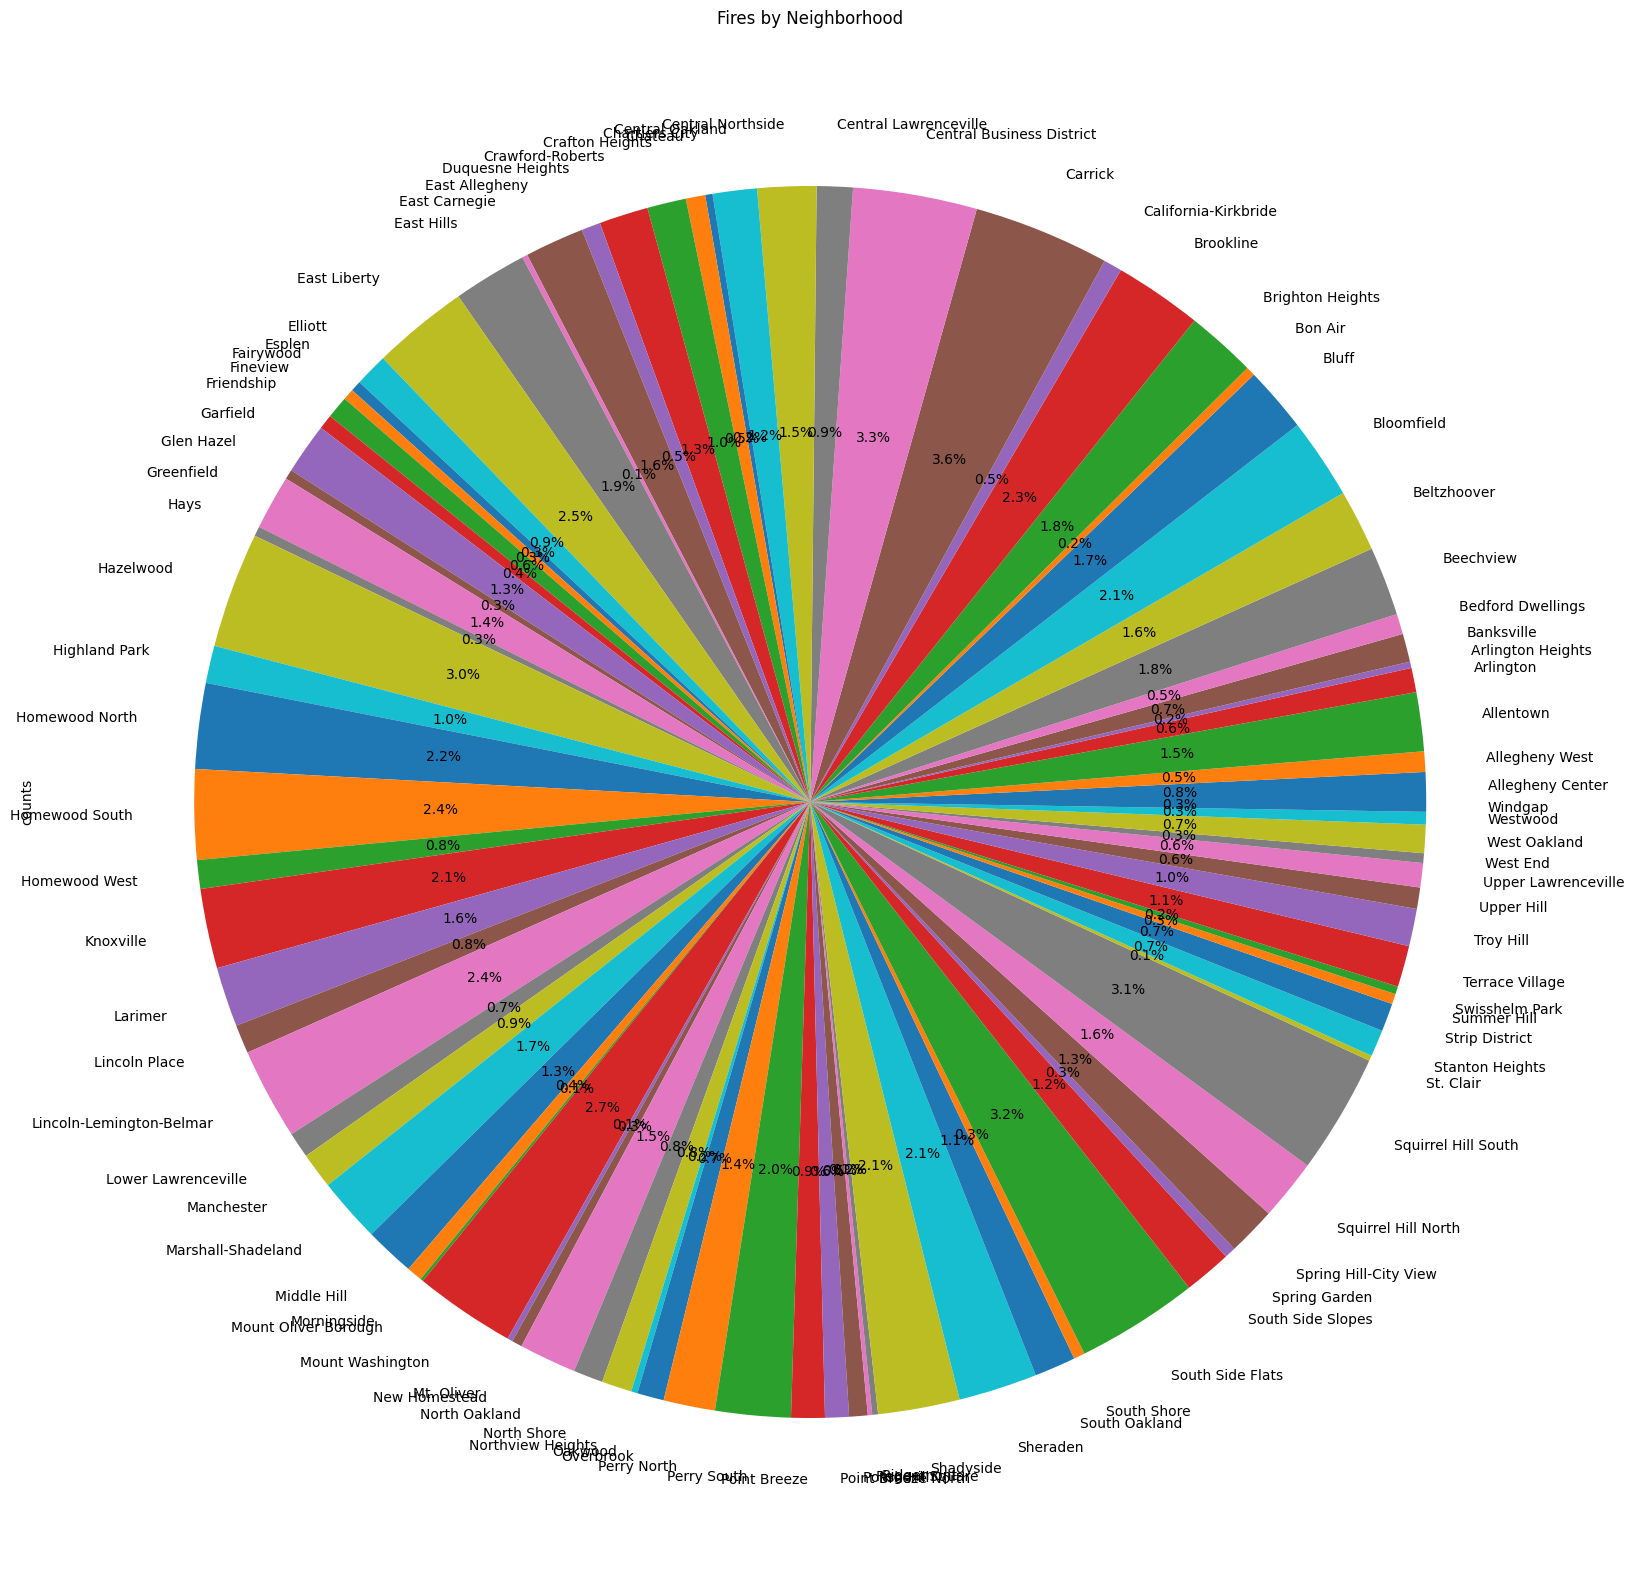

In [ ]:
#extract relevant columns and filter out rows with missing values
df_neighborhood = data[['neighborhood']].dropna()

#group the data by neighborhood and count the occurrences
grouped = df_neighborhood.groupby(['neighborhood']).size().reset_index(name='counts')

#group the data by neighborhood and count the occurrences
sorted_neighborhoods = df_neighborhood.groupby(['neighborhood']).size().reset_index(name='counts')

#create a pie chart for the neighborhoods with the most fires
chart = sorted_neighborhoods.plot(kind='pie', y='counts', labels=sorted_neighborhoods['neighborhood'], legend=False, autopct='%1.1f%%', figsize=(20, 20), title='Fires by Neighborhood')


We can see here that the neighborhood with the most amount of fires is Carrick at 3.6%. We then used the value_counts().nsmallest(10) to access the the 10 smallest fire counts by neighborhood

<Axes: >

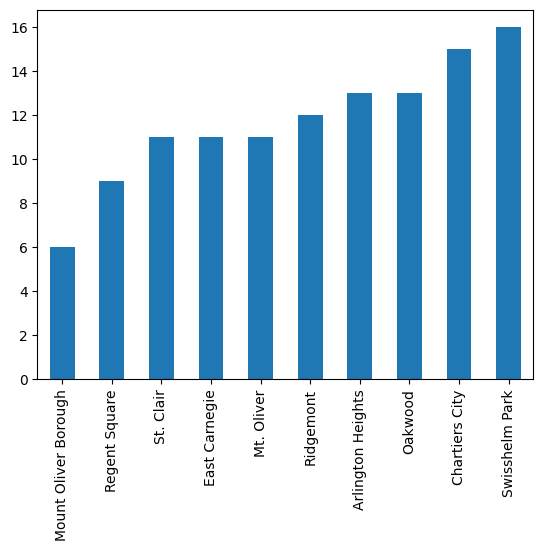

In [ ]:
#Get the top 10 neighborhoods with the most fires
top_10_neighborhoods = data['neighborhood'].value_counts().nsmallest(10)

#Create a bar chart of the top 10 neighborhoods
top_10_neighborhoods.plot(kind='bar')


The least amount of fires occurs in Mount Oliver Borough.

However, are the fires in Carrick and other neighborhoods worth the concern? Lets arrange all of the neighborhoods by what type of fires are most common. 

In [ ]:
cause_counts = data.groupby(['neighborhood', 'type_description']).size().reset_index(name='count')


In [ ]:
cause_counts

,neighborhood,type_description,count
0,Allegheny Center,Brush or brush-and-grass mixture fire,6
1,Allegheny Center,Building fire,2
2,Allegheny Center,"Cooking fire, confined to container",17
3,Allegheny Center,Dumpster or other outside trash receptacle fire,5
4,Allegheny Center,"Fire in portable building, fixed location",1
...,...,...,...
1264,Windgap,"Natural vegetation fire, Other",1
1265,Windgap,"Outside rubbish fire, Other",2
1266,Windgap,"Outside rubbish, trash or waste fire",1
1267,Windgap,"Special outside fire, Other",1


In [ ]:
most_common_causes = cause_counts.loc[cause_counts.groupby('neighborhood')['count'].idxmax()]

In [ ]:
print(most_common_causes.loc[most_common_causes['neighborhood'] == 'Carrick'])

    neighborhood type_description  count
218      Carrick    Building fire     81


We now know that the most common types of fire in Carrick is a building fire, which is certainly of worthy concern. 

However, could there be anything else that could be causing these fires? Is there perhaps a coorelation between population and fires? Could we maybe use fires per capita as our metric instead of just raw fire count?


In [ ]:
import pandas as pd
from io import StringIO

#Read the file as bytes
with open('pittpop2.csv', 'rb') as file:
    byte_sequence = file.read()

#Decode any non-ISO-8859-1 characters in the file
decoded_text = byte_sequence.decode('iso-8859-1')

#Create a Pandas DataFrame from the decoded CSV data
csv_data = StringIO(decoded_text)

df = pd.read_csv(csv_data)

print(df.head(30))

               City     Year                        Population
0   Allegheny Center  2020.0                              5627
1                NaN  2010.0                              5627
2                NaN  2000.0                              2204
3                NaN  1990.0                              2204
4                NaN  1980.0    (.03) *2201, 2204, (.02) *2205
5                NaN  1970.0    (.03) *2201, 2204, (.02) *2205
6                NaN  1960.0  (.03) *22A, 22D, 22E, (.02) *22G
7                NaN  1950.0  (.03) *22A, 22D, 22E, (.02) *22G
8                NaN  1940.0  (.03) *22A, 22D, 22E, (.02) *22G
9     Allegheny West  2020.0                              5627
10               NaN  2010.0                              5627
11               NaN  2000.0                              2201
12               NaN  1990.0                              2201
13               NaN  1980.0                       (.97) *2201
14               NaN  1970.0                       (.97

In [ ]:
print(df.columns)
df.dropna(subset=['City '], inplace=True)
print(df)


Index(['City ', 'Year', 'Population'], dtype='object')
                   City     Year Population
0       Allegheny Center  2020.0       5627
9         Allegheny West  2020.0       5627
18             Allentown  2020.0       1803
27             Arlington  2020.0       1610
36     Arlington Heights  2020.0       1610
..                   ...     ...        ...
766  Upper Lawrenceville  2020.0       1011
775             West End  2020.0       5626
784         West Oakland  2020.0        402
793             Westwood  2020.0       5631
802              Windgap  2020.0       5630

[90 rows x 3 columns]


In [ ]:
merged = df.set_index('City ').join(grouped.set_index('neighborhood'))

In [ ]:
merged.index

Index(['Allegheny Center', 'Allegheny West', 'Allentown', 'Arlington',
       'Arlington Heights', 'Banksville', 'Bedford Dwellings', 'Beechview',
       'Beltzhoover', 'Bloomfield', 'Bluff', 'Bon Air', 'Brighton Heights',
       'Brookline', 'California Kirkbride', 'Carrick', 'Central Lawrenceville',
       'Central Northside', 'Central Oakland', 'Chartiers City', 'Chateau',
       'Crafton Heights', 'Crawford-Roberts', 'Duquesne Heights',
       'East Allegheny', 'East Carnegie', 'East Hills', 'East Liberty',
       'Elliott', 'Esplen', 'Fairywood', 'Fineview', 'Friendship', 'Garfield',
       'Glen Hazel', 'Golden Triangle/Civic Arena', 'Greenfield', 'Hays',
       'Hazelwood', 'Highland Park', 'Homewood North', 'Homewood South',
       'Homewood West', 'Knoxville', 'Larimer', 'Lincoln-Lemington-Belmar',
       'Lincoln Place', 'Lower Lawrenceville', 'Manchester',
       'Marshall-Shadeland', 'Middle Hill', 'Morningside',
       'Mount Oliver Neighborhood', 'Mount Washington', 'New 

In [ ]:
print(merged.head())

                     Year Population  counts
City                                        
Allegheny Center   2020.0       5627    61.0
Allegheny West     2020.0       5627    42.0
Allentown          2020.0       1803   121.0
Arlington          2020.0       1610    50.0
Arlington Heights  2020.0       1610    13.0
Index(['Year', 'Population', 'counts'], dtype='object')


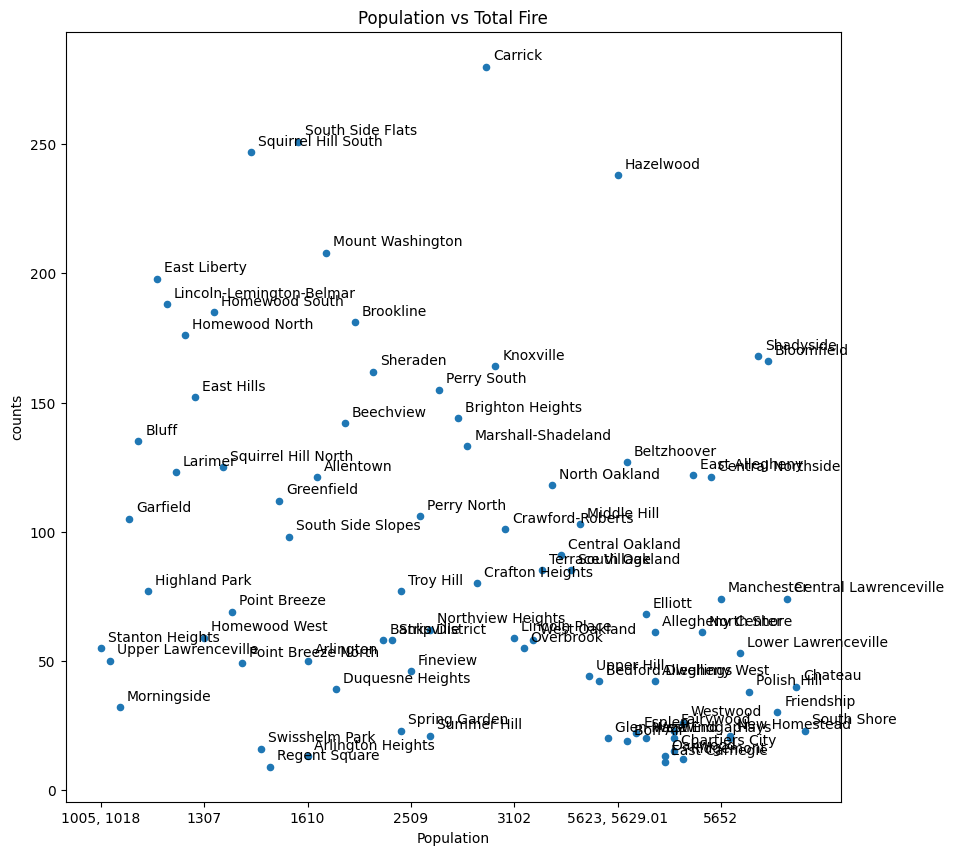

In [ ]:
import numpy as np
import matplotlib.ticker as ticker

merged.sort_values('Population', inplace=True)

#Create the scatter plot
ax = merged.plot.scatter(x='Population', y='counts', figsize=(10, 10), title='Population vs Total Fire')


#Annotate each data point with the corresponding city name
for i, row in merged.iterrows():
    ax.annotate(row.name, xy=(row['Population'], row['counts']), xytext=(5, 5), textcoords='offset points')


ax.set_xticks(ax.get_xticks()[::11])


## Winner: Oliver Borough

There is no appearable corelation between amount of fires and population in the different Pittsburgh neighborhoods. And even if there were, thats still a fire that the entire neighborhood has to live through no matter the population size responsible for causing it. Mount Oliver Borough is clearly the safest, healthiest, stress-free (livable) place to live in regards to least amount of Fires.

## Metric #2: Walkability
### By Brandon McCoy
Walkability refers to how easy and pleasant it is to walk in a particular area, taking into account factors like pedestrian safety, access to amentities, and sidewalk quality. To help determine this metric, I'm going to use a dataset titled "Allegheny County Walk Scores", which provides a walkscore for each tract based on walking routes to nearby amentities and pedestrian friendliness (which is determined by population density and road metrics like block length and intersection density). 

To get started, lets import the necessary libraries and load in the data to see what we have:

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

walkscores = pd.read_csv("Brandon/walkscorect.xls-walk-score-by-ct.csv")

walkscores.head(10)

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
5,40400,82
6,40500,78
7,40600,75
8,40900,68
9,50100,60


While this is helpful, the census tract isn't a great descriptor for the neighborhood. In addition, I want to merge this dataset with a shape file of Pittsburgh's neighborhoods later on for a visual representation of the walkscores around the city. This requires the neighborhood names to be present in this dataset so that I can merge on that column. To fix this, I'm going to use another dataset titled "2010 Census Tracts", which links the name of a neighborhood to its census tract number. Lets merge the two datasets based on that census tract column. The walkability dataset also includes neighborhoods outside of Pittsburgh, so merging this way fixed that issue by only including those within city limits (from the census tracts dataset).

In [6]:
# reading the census tracts dataset
tracts = pd.read_csv("Brandon/9756af5f-3320-4601-84e2-347d64071e25.csv")

# merging the two datasets on the tracts column
walkscores = walkscores.merge(tracts, left_on='Census Tract', right_on='tractce10')
walkscores.head()

,Census Tract,Walk Score,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,10300,82,20,42,3,10300,2,420030103002,Block Group 2,G5030,...,1,10300,4,300,465,64.516129,64.51,Yes,9.127091e+06,15724.389802
1,20100,100,7,42,3,20100,4,420030201004,Block Group 4,G5030,...,2,20100,6,1125,2875,39.130435,39.13,No,1.784591e+07,23034.929056
2,20300,83,6,42,3,20300,1,420030203001,Block Group 1,G5030,...,3,20300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
3,30500,77,4,42,3,30500,2,420030305002,Block Group 2,G5030,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,40200,71,3,42,3,40200,2,420030402002,Block Group 2,G5030,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081


Since we only care about walkscores, lets remove the unnecessary columns to clean up the dataset.

In [7]:
walkscores = walkscores[['Census Tract', 'Walk Score', 'hood']] # removing all columns except the ones specified here
walkscores = walkscores.rename(columns={'hood': 'Neighborhood'}) # renaming the neighborhood column to make it look better
walkscores.head(10)

,Census Tract,Walk Score,Neighborhood
0,10300,82,Bluff
1,20100,100,Central Business District
2,20300,83,Strip District
3,30500,77,Crawford-Roberts
4,40200,71,West Oakland
5,40400,82,North Oakland
6,40500,78,Central Oakland
7,40600,75,Central Oakland
8,40900,68,South Oakland
9,50100,60,Middle Hill


As you can see with Central Oakland, some neighborhoods consist of multiple tract numbers. To fix this and have a single walkscore for each neighborhood, lets remove duplicate neighborhoods and simply keep the highest walkscore among the different tracts for those neighborhoods. To do this, I just sorted the walkscores in descending order and used the groupby() function to keep only the first instance of a neighborhood.

In [8]:
walkscores = walkscores.sort_values(by='Walk Score', ascending=False) # sorting the dataset based on walkscore in descending order
walkscores = walkscores.groupby('Neighborhood').first().reset_index() # groupby() to create a new dataset and keep only the first instance of a neigborhood name
walkscores.head(10)

,Neighborhood,Census Tract,Walk Score
0,Allegheny West,562700,86
1,Allentown,180300,63
2,Arlington,561600,26
3,Banksville,202300,48
4,Bedford Dwellings,50900,77
5,Beechview,192000,57
6,Beltzhoover,562400,40
7,Bloomfield,80900,86
8,Bluff,10300,82
9,Brighton Heights,270300,55


Lets plot the top 15 neighborhoods

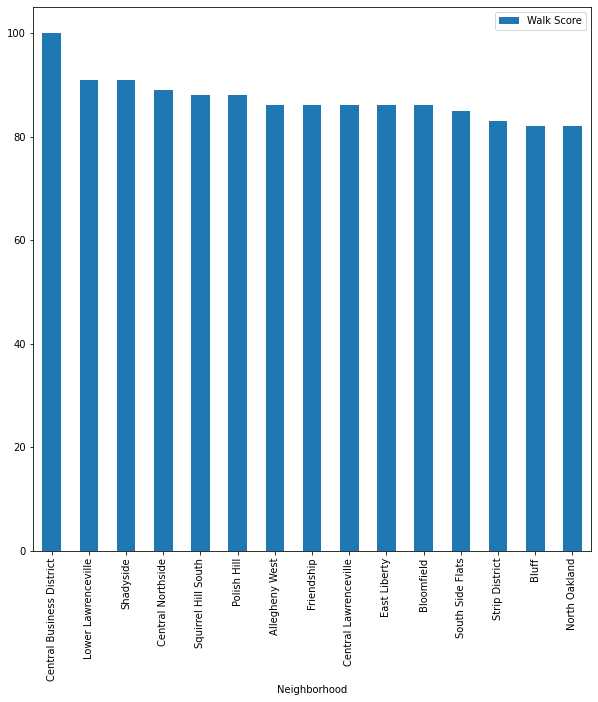

In [9]:
walkscores = walkscores.sort_values(by='Walk Score', ascending=False)
walkscores.head(15).plot.bar(x='Neighborhood', y='Walk Score', figsize=(10,10))

Lets plot the bottom 15 neighborhoods

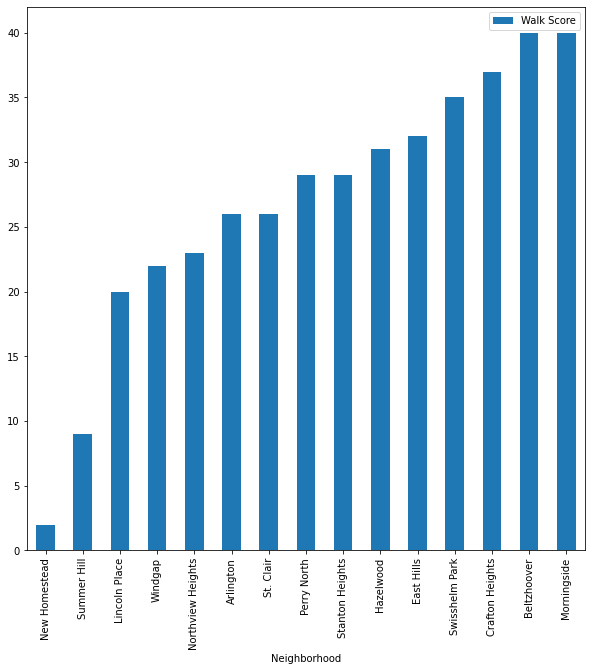

In [10]:
walkscores.sort_values(by='Walk Score').head(15).plot.bar(x="Neighborhood", y="Walk Score", figsize=(10,10))

Lets merge that dataframe with a shape file of Pittsburgh's neighborhoods to get a visual represetation of the walkscores around the city.

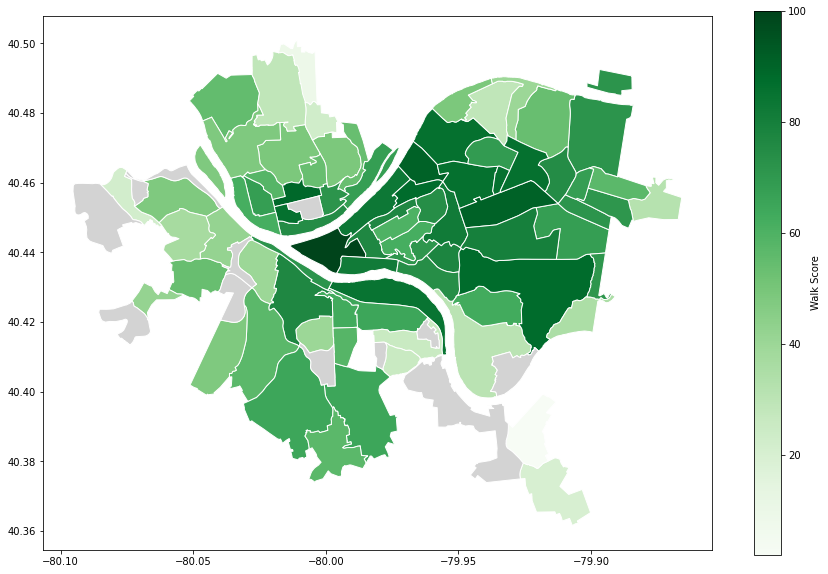

In [12]:
neighborhoods = gpd.read_file('Brandon/Neighborhoods/Neighborhoods_.shp') # reading in the shape file
walkability_map = neighborhoods.merge(walkscores, how='left', left_on='hood', right_on='Neighborhood') # merging on the neighborhood name column
walkability_map.head()
walkability_map.plot(column='Walk Score', 
               cmap='Greens',                                         # choose a color palette
               edgecolor="white",                                     # outline the districts in white
               legend=True,                                           # show the legend
               legend_kwds={'label': "Walk Score"},                   # label the legend
               figsize=(15, 10),                                      # set the size
               missing_kwds={"color": "lightgrey"}                    # set disctricts with no data to gray
               )

As you can see, Downtown is the clear winner with a walk score of 100. There are also many neighborhoods on the East End that aren't far behind and have similar scores like Lawrenceville, Shadyshide, Squirrel Hill, Bloomfield, and Friendship. If you care about walkability, it's clear you should avoid New Homestead since it's walk score is by far the lowest, which comes in at a measly 5.

## Metric #3: 

## The Best Overall Neighborhood